In [12]:
!pip install yfinance

In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score


In [15]:
data = yf.download("EURUSD=X", start="2020-01-01", end="2024-01-01")



/tmp/ipython-input-3457649746.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("EURUSD=X", start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [16]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X
Date,,,,,
2020-01-01,1.122083,1.122838,1.115947,1.122083,0
2020-01-02,1.122083,1.122712,1.116682,1.121894,0
2020-01-03,1.117144,1.118068,1.112570,1.117081,0
2020-01-06,1.116196,1.120825,1.115810,1.116246,0
2020-01-07,1.119799,1.119946,1.113487,1.119583,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1043 entries, 2020-01-01 to 2023-12-29
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, EURUSD=X)   1043 non-null   float64
 1   (High, EURUSD=X)    1043 non-null   float64
 2   (Low, EURUSD=X)     1043 non-null   float64
 3   (Open, EURUSD=X)    1043 non-null   float64
 4   (Volume, EURUSD=X)  1043 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 48.9 KB


In [18]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.0
mean,1.115228,1.118776,1.111506,1.115199,0.0
std,0.062791,0.062204,0.063275,0.062771,0.0
min,0.959619,0.967006,0.954016,0.959619,0.0
25%,1.072869,1.075727,1.069433,1.072869,0.0
50%,1.103205,1.106900,1.099832,1.103205,0.0
75%,1.176516,1.178730,1.172526,1.176318,0.0
max,1.234111,1.235025,1.226693,1.233776,0.0


In [19]:
data['Return'] = data['Close'].pct_change()

data['Rolling_Mean_5'] = data['Close'].rolling(5).mean()
data['Rolling_Std_5'] = data['Return'].rolling(5).std()

data['Lagged_Return'] = data['Return'].shift(1)

data['Future_Volatility'] = data['Return'].rolling(5).std().shift(-1)

data.dropna(inplace=True)


In [20]:
X = data[['Return', 'Rolling_Mean_5', 'Rolling_Std_5', 'Lagged_Return']]
y = data['Future_Volatility']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)


In [26]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1.3309625546789633e-06
R² Score: 0.7536234796069903


In [28]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coeff_df


,Feature,Coefficient
0,"(Return, )",0.010729
1,"(Rolling_Mean_5, )",-0.003166
2,"(Rolling_Std_5, )",0.748973
3,"(Lagged_Return, )",0.000642


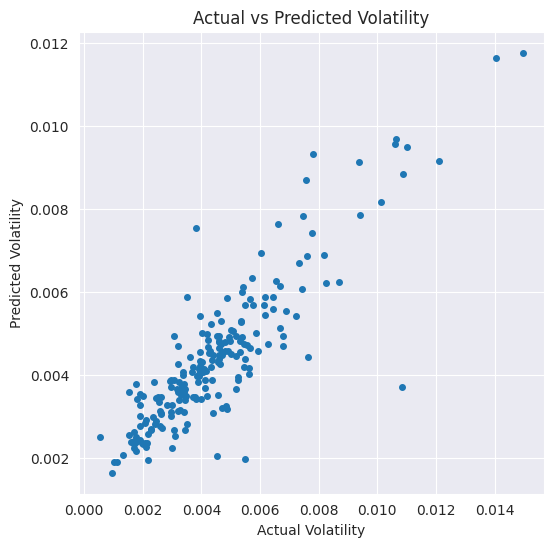

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Volatility")
plt.ylabel("Predicted Volatility")
plt.title("Actual vs Predicted Volatility")
plt.show()
